In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np



In [2]:
#create Request
page=requests.get('https://www.flipkart.com/campus-royce-2-running-shoes-men/product-reviews/itm1e6cfbe3931a7?pid=DHYFHFV5ACGNBFDT&lid=LSTDHYFHFV5ACGNBFDTJS73VN&marketplace=FLIPKART&page=2').text

In [3]:
soup=BeautifulSoup(page,'lxml')

In [4]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>\n  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>\n  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css" rel="stylesheet"/>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>\n  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>\n  <meta content="102988293558" property="fb:page_id"/>\n  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>\n  <meta content="noodp" name="robots"/>\n  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>\n  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>\n  <meta content="website" property="og:type"/>\n  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>\n  <link href="/appl

In [5]:
soup.find_all('div',class_='_2s4DIt _1PEOhe')

[<div class="_2s4DIt _1PEOhe">CAMPUS ROYCE-2 Running Shoes For Men Reviews</div>]

# **TO FIND OUT THE RATINGS**

In [6]:
soup.find('div',class_='_3LWZlK _1BLPMq _3B8WaH').text


'4'

# **TO FIND REVIEWS**

In [7]:
soup.find('div',class_='_6K-7Co').text
  


'awesome product tnq flipkart'

# **TO FIND USER NAME**

In [8]:
soup.find('p',class_='_2sc7ZR _2V5EHH _1QgsS5').text


'Flipkart Customer'

In [9]:
for i in soup.find_all('p',attrs={'class':'_2sc7ZR'}):
  print(i.text)

Flipkart Customer
Oct, 2019
Vishal  Thakur
Sep, 2019
sharad nikam
Oct, 2019
Jintu Talukdar
Dec, 2019
Naveen Roy
Jan, 2021
Vikki Kumar
Jul, 2019
Atul sharma
Jan, 2021
Pinku Roy
Jun, 2021
Preety Goswami
Dec, 2019
Saroj kumar
Mar, 2020


# **CONSIDERING THE WHOLE CONTAINER**

In [10]:
container=soup.find_all('div',class_='col _2wzgFH K0kLPL _1QgsS5')

# **CREATING DATAFRAME FOR SINGLE PAGE**

In [11]:
name=[]
reviews=[]
rating=[]
for i in container:
  name.append(i.find('p',class_='_2sc7ZR _2V5EHH _1QgsS5').text)
  reviews.append(i.find('div',class_='_6K-7Co').text)
  rating.append(i.find('div',class_='_3LWZlK _1BLPMq _3B8WaH').text)
df=pd.DataFrame({'Name':name,'Reviews':reviews,'Rating':rating})
df

,Name,Reviews,Rating
0,Flipkart Customer,awesome product tnq flipkart,4
1,Vishal Thakur,product is light weight and comfortable...But ...,4
2,sharad nikam,quality shoes for campus 👟👟👟👟,5
3,Jintu Talukdar,good shoe under this budget,5
4,Naveen Roy,Really amaging look.. and the quality is very ...,5
5,Vikki Kumar,very nice shoe,5
6,Atul sharma,Pro level comfort and superb quality with awes...,5
7,Pinku Roy,Excelent product,5
8,Preety Goswami,good product😊😊😊😍😍😍,4
9,Saroj kumar,"Very Gud nd comfortable shoe. Color is lovely,...",4


# **CREATING DATAFRAME FOR ALL PAGE**

In [12]:
final=pd.DataFrame()

  
for j in range(1,300):

  url='https://www.flipkart.com/campus-royce-2-running-shoes-men/product-reviews/itm1e6cfbe3931a7?pid=DHYFHFV5ACGNBFDT&lid=LSTDHYFHFV5ACGNBFDTJS73VN&marketplace=FLIPKART&page={}'.format(j)
  headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
  #-requests.get('url',headers=headers).text
  webpage=requests.get(url,headers=headers).text
  soup=BeautifulSoup(webpage,'lxml')
  container=soup.find_all('div',class_='col _2wzgFH K0kLPL _1QgsS5')
  name=[]
  reviews=[]
  rating=[]
  for i in container:
    try:
      name.append(i.find('p',class_='_2sc7ZR _2V5EHH _1QgsS5').text)
    except:
      name.append(np.nan)
    try:
      reviews.append(i.find('div',class_='_6K-7Co').text)
    except:
      reviews.append(np.nan)
    try:   
      rating.append(i.find('div',class_='_3LWZlK _1BLPMq _3B8WaH').text)
    except:
      rating.append(np.nan)
  #for i in product_review:
     #name.append(i.find('p',class_='_2sc7ZR _2V5EHH').text)
     #reviews.append(i.find('div',class_='t-ZTKy').text)
     #ratings.append(i.find('div',class_='_3LWZlK _1BLPMq').text)
     #ratings.append(i.find('div',class_='_3LWZlK _1BLPMq').text)
     #name.append(i.find('p',class_='_2sc7ZR _2V5EHH'))
     #reviews.append(i.find('div',class_='t-ZTKy'))
     #ratings.append(i.find('div',class_='_3LWZlK _1BLPMq'))


  df=pd.DataFrame({'Name':name,'Reviews':reviews,'Rating':rating})
  final=final.append(df,ignore_index=True)
  
  


  

In [13]:
final

,Name,Reviews,Rating
0,Lovneesh Tyagi,Comfortable 👍,5
1,Sushil Kumar,Very Comfortable...Wearing more than 6 hours b...,5
2,Arup kumar Mandal,Light weight and flexible ... perfect for runn...,5
3,Parvesh Kashyap,excellent and perfect pieces,5
4,Amiya Sankar Ghana,nice shoes..,5
...,...,...,...
2095,Shambhu Yogi,Good,4
2096,sudhir yadav,Shoe nice and comfortable,4
2097,Vinod Kumar Singh,Perfect shoes,5
2098,Shyam Krishna,Nice shoes,5


# **CREATE CSV FILE & SAVE INTO DRIVE**

In [14]:
from google.colab import drive
drive.mount('/content/drive')
'''path='/content/drive/MyDrive/CSV/Reviws&rating.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:'''
final.to_csv('/content/drive/MyDrive/Reviews.csv')

Mounted at /content/drive


# **LOAD CSV FILE FROM DRIVE**

In [15]:
path = "/content/drive/MyDrive/Reviews.csv"
file= pd.read_csv(path)

# **START OUR MAIN PROJECT USING LOADED FILE**


In [16]:
file

,Unnamed: 0,Name,Reviews,Rating
0,0,Lovneesh Tyagi,Comfortable 👍,5.0
1,1,Sushil Kumar,Very Comfortable...Wearing more than 6 hours b...,5.0
2,2,Arup kumar Mandal,Light weight and flexible ... perfect for runn...,5.0
3,3,Parvesh Kashyap,excellent and perfect pieces,5.0
4,4,Amiya Sankar Ghana,nice shoes..,5.0
...,...,...,...,...
2095,2095,Shambhu Yogi,Good,4.0
2096,2096,sudhir yadav,Shoe nice and comfortable,4.0
2097,2097,Vinod Kumar Singh,Perfect shoes,5.0
2098,2098,Shyam Krishna,Nice shoes,5.0


In [17]:
#checking shape of our data
file.shape

(2100, 4)

In [18]:
#infor mation of our data like missing value,data type
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2100 non-null   int64  
 1   Name        2100 non-null   object 
 2   Reviews     2100 non-null   object 
 3   Rating      1966 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.8+ KB


remove null values

In [19]:
file.dropna()

,Unnamed: 0,Name,Reviews,Rating
0,0,Lovneesh Tyagi,Comfortable 👍,5.0
1,1,Sushil Kumar,Very Comfortable...Wearing more than 6 hours b...,5.0
2,2,Arup kumar Mandal,Light weight and flexible ... perfect for runn...,5.0
3,3,Parvesh Kashyap,excellent and perfect pieces,5.0
4,4,Amiya Sankar Ghana,nice shoes..,5.0
...,...,...,...,...
2095,2095,Shambhu Yogi,Good,4.0
2096,2096,sudhir yadav,Shoe nice and comfortable,4.0
2097,2097,Vinod Kumar Singh,Perfect shoes,5.0
2098,2098,Shyam Krishna,Nice shoes,5.0







# There is no NULL values in our data .

In [20]:
#Take a look into Reviws Columns
file['Reviews']

0                                           Comfortable 👍
1       Very Comfortable...Wearing more than 6 hours b...
2       Light weight and flexible ... perfect for runn...
3                            excellent and perfect pieces
4                                            nice shoes..
                              ...                        
2095                                                 Good
2096                            Shoe nice and comfortable
2097                                        Perfect shoes
2098                                           Nice shoes
2099                                                 Nice
Name: Reviews, Length: 2100, dtype: object

In [21]:
#Take a look into Reviws Columns
file['Rating']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
2095    4.0
2096    4.0
2097    5.0
2098    5.0
2099    5.0
Name: Rating, Length: 2100, dtype: float64

# **IMPORT LIBRARIES**

In [22]:
!pip install gensim
import pandas as pd
import numpy as np
import os
import gensim
import nltk
nltk.download("popular")
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from collections import Counter
from sklearn import model_selection, svm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [23]:
file

,Unnamed: 0,Name,Reviews,Rating
0,0,Lovneesh Tyagi,Comfortable 👍,5.0
1,1,Sushil Kumar,Very Comfortable...Wearing more than 6 hours b...,5.0
2,2,Arup kumar Mandal,Light weight and flexible ... perfect for runn...,5.0
3,3,Parvesh Kashyap,excellent and perfect pieces,5.0
4,4,Amiya Sankar Ghana,nice shoes..,5.0
...,...,...,...,...
2095,2095,Shambhu Yogi,Good,4.0
2096,2096,sudhir yadav,Shoe nice and comfortable,4.0
2097,2097,Vinod Kumar Singh,Perfect shoes,5.0
2098,2098,Shyam Krishna,Nice shoes,5.0


# **WE NEED ONLY Reviews & Rating COULMN SO WE DROP REMAINING COLUMNS**

In [24]:
file.drop(columns=['Unnamed: 0','Name'],inplace=True)
file

,Reviews,Rating
0,Comfortable 👍,5.0
1,Very Comfortable...Wearing more than 6 hours b...,5.0
2,Light weight and flexible ... perfect for runn...,5.0
3,excellent and perfect pieces,5.0
4,nice shoes..,5.0
...,...,...
2095,Good,4.0
2096,Shoe nice and comfortable,4.0
2097,Perfect shoes,5.0
2098,Nice shoes,5.0


# **NOW WE WORK ON Review COLUMN**

In [25]:
file['Reviews']

0                                           Comfortable 👍
1       Very Comfortable...Wearing more than 6 hours b...
2       Light weight and flexible ... perfect for runn...
3                            excellent and perfect pieces
4                                            nice shoes..
                              ...                        
2095                                                 Good
2096                            Shoe nice and comfortable
2097                                        Perfect shoes
2098                                           Nice shoes
2099                                                 Nice
Name: Reviews, Length: 2100, dtype: object

Remove digits and words containing digits we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words. To do this, I am using regular expressions with lambda functions.

In [26]:
import re
file['Reviews']=file['Reviews'].apply(lambda x: re.sub('\w*\d\w*','', x))
file['Reviews']

0                                           Comfortable 👍
1       Very Comfortable...Wearing more than  hours bu...
2       Light weight and flexible ... perfect for runn...
3                            excellent and perfect pieces
4                                            nice shoes..
                              ...                        
2095                                                 Good
2096                            Shoe nice and comfortable
2097                                        Perfect shoes
2098                                           Nice shoes
2099                                                 Nice
Name: Reviews, Length: 2100, dtype: object

Expanding Contracted Words Contractions are the shortened versions of words like don’t for do not and how’ll for how will. These are used to reduce the speaking and writing time of words. We need to expand these contractions for a better analysis of the reviews

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

In [27]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 13.7 MB/s eta 0:00:00


In [28]:

import contractions
file['Reviews']=file['Reviews'].apply(lambda x : contractions.fix(x))
file['Reviews']

0                                           Comfortable 👍
1       Very Comfortable...Wearing more than  hours bu...
2       Light weight and flexible ... perfect for runn...
3                            excellent and perfect pieces
4                                            nice shoes..
                              ...                        
2095                                                 Good
2096                            Shoe nice and comfortable
2097                                        Perfect shoes
2098                                           Nice shoes
2099                                                 Nice
Name: Reviews, Length: 2100, dtype: object

In [29]:
#Removing Non-sensical Words
file['Reviews'] = [re.sub('\n', '', x) for x in file['Reviews']]
file['Reviews']

0                                           Comfortable 👍
1       Very Comfortable...Wearing more than  hours bu...
2       Light weight and flexible ... perfect for runn...
3                            excellent and perfect pieces
4                                            nice shoes..
                              ...                        
2095                                                 Good
2096                            Shoe nice and comfortable
2097                                        Perfect shoes
2098                                           Nice shoes
2099                                                 Nice
Name: Reviews, Length: 2100, dtype: object

Remove Punctuations Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:

In [30]:
import string
file['Reviews'] = file['Reviews'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [31]:
#Removing Extra Spaces
file['Reviews'] = file['Reviews'].apply(lambda x: re.sub(' +',' ',x))
file['Reviews'] 

0                                           Comfortable 👍
1       Very ComfortableWearing more than hours but no...
2           Light weight and flexible perfect for running
3                            excellent and perfect pieces
4                                              nice shoes
                              ...                        
2095                                                 Good
2096                            Shoe nice and comfortable
2097                                        Perfect shoes
2098                                           Nice shoes
2099                                                 Nice
Name: Reviews, Length: 2100, dtype: object

# **Remove emoji**

In [32]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
remove_emoji("Just amazing🤩🤩 satisfied😊😊 camera just awesome and display sound quality awesome..READ MORE")

'Just amazing satisfied camera just awesome and display sound quality awesome..READ MORE'

In [33]:
without_emoji=[]
for i in file['Reviews']:
  without_emoji.append(remove_emoji(i))
without_emoji

['Comfortable ',
 'Very ComfortableWearing more than hours but no pain',
 'Light weight and flexible perfect for running',
 'excellent and perfect pieces',
 'nice shoes',
 'awesome very comfortable',
 'Good ',
 'Nice product',
 'I like the shoes best for sports',
 'Very good shoes',
 'awesome product tnq flipkart',
 'product is light weight and comfortableBut Packaging was not too good pls improve packaging by Flipkart',
 'quality shoes for campus ',
 'good shoe under this budget',
 'Really amaging look and the quality is very GoodThanks to flipkart',
 'very nice shoe',
 'Pro level comfort and superb quality with awesome designIt wins my heart',
 'Excelent product',
 'good product',
 'Very Gud nd comfortable shoe Color is lovely perfect fit look is also nice I will give star for this shoe',
 'Awesome product',
 'Excellent shoes And so comfortable or best quality',
 'Nice  QualitySame colour as photoComfortableOverall product was Good in this price Range',
 'Very nice shoe',
 'awesome a

In [34]:
file['Without_emoji']=without_emoji
file

,Reviews,Rating,Without_emoji
0,Comfortable 👍,5.0,Comfortable
1,Very ComfortableWearing more than hours but no...,5.0,Very ComfortableWearing more than hours but no...
2,Light weight and flexible perfect for running,5.0,Light weight and flexible perfect for running
3,excellent and perfect pieces,5.0,excellent and perfect pieces
4,nice shoes,5.0,nice shoes
...,...,...,...
2095,Good,4.0,Good
2096,Shoe nice and comfortable,4.0,Shoe nice and comfortable
2097,Perfect shoes,5.0,Perfect shoes
2098,Nice shoes,5.0,Nice shoes


Removing Stopwords and Lemmatization Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form

In [35]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
file['Final_text']=file['Without_emoji'] .apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [36]:
file['Final_text']

0                             comfortable
1            ComfortableWearing hour pain
2       light weight flexible perfect run
3                 excellent perfect piece
4                               nice shoe
                      ...                
2095                                 good
2096                shoe nice comfortable
2097                         perfect shoe
2098                            nice shoe
2099                                 nice
Name: Final_text, Length: 2100, dtype: object

In [37]:
file['Final_text'] = [re.sub('httpstco', '', x) for x in file['Final_text']]
file['Final_text']

0                             comfortable
1            ComfortableWearing hour pain
2       light weight flexible perfect run
3                 excellent perfect piece
4                               nice shoe
                      ...                
2095                                 good
2096                shoe nice comfortable
2097                         perfect shoe
2098                            nice shoe
2099                                 nice
Name: Final_text, Length: 2100, dtype: object

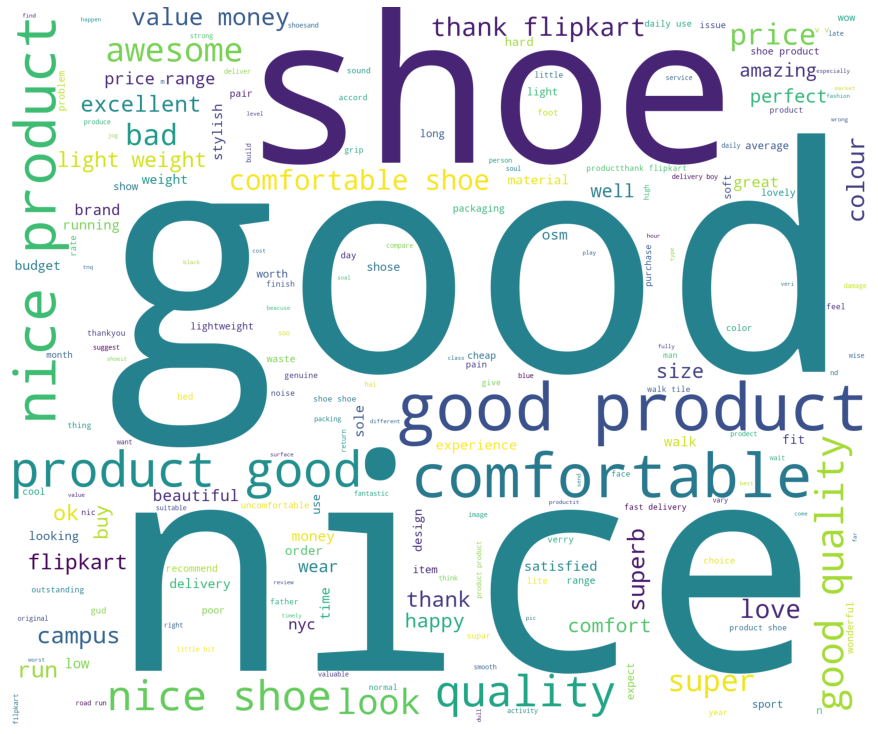

In [38]:
#Making word Clouds
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

comment_words = ''
 
# iterate through the csv file
for val in file['Final_text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width =1800, height = 1500,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [39]:
#Pie Chart for Sentiments
import plotly.express as px

In [40]:
sentiment_pie = file['Rating'].replace({5 : 'Positive',4 : 'Positive' ,3 : 'Negative',2 : 'Negative', 1 : 'Negative'})
Rating = sentiment_pie.value_counts()
fig = px.pie(values=Rating.values, 
             names=Rating.index,
             color_discrete_sequence=px.colors.sequential.Darkmint)
fig.update_traces(textposition='inside',
                  textfont_size=15,
                  textinfo='percent+label')
fig.update_layout(title_text="Sentiment Pie Graph",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.show()

In [41]:
from collections import Counter
import seaborn as sns 
#Most Common Words¶
most_common_original = Counter(''.join(file['Reviews']).split()).most_common(50)
mco_df = pd.DataFrame(most_common_original, columns = ['Words', 'Freq'])
most_common_final = Counter(''.join(file['Final_text']).split()).most_common(50)
mcf_df = pd.DataFrame(most_common_final, columns = ['Words', 'Freq'])

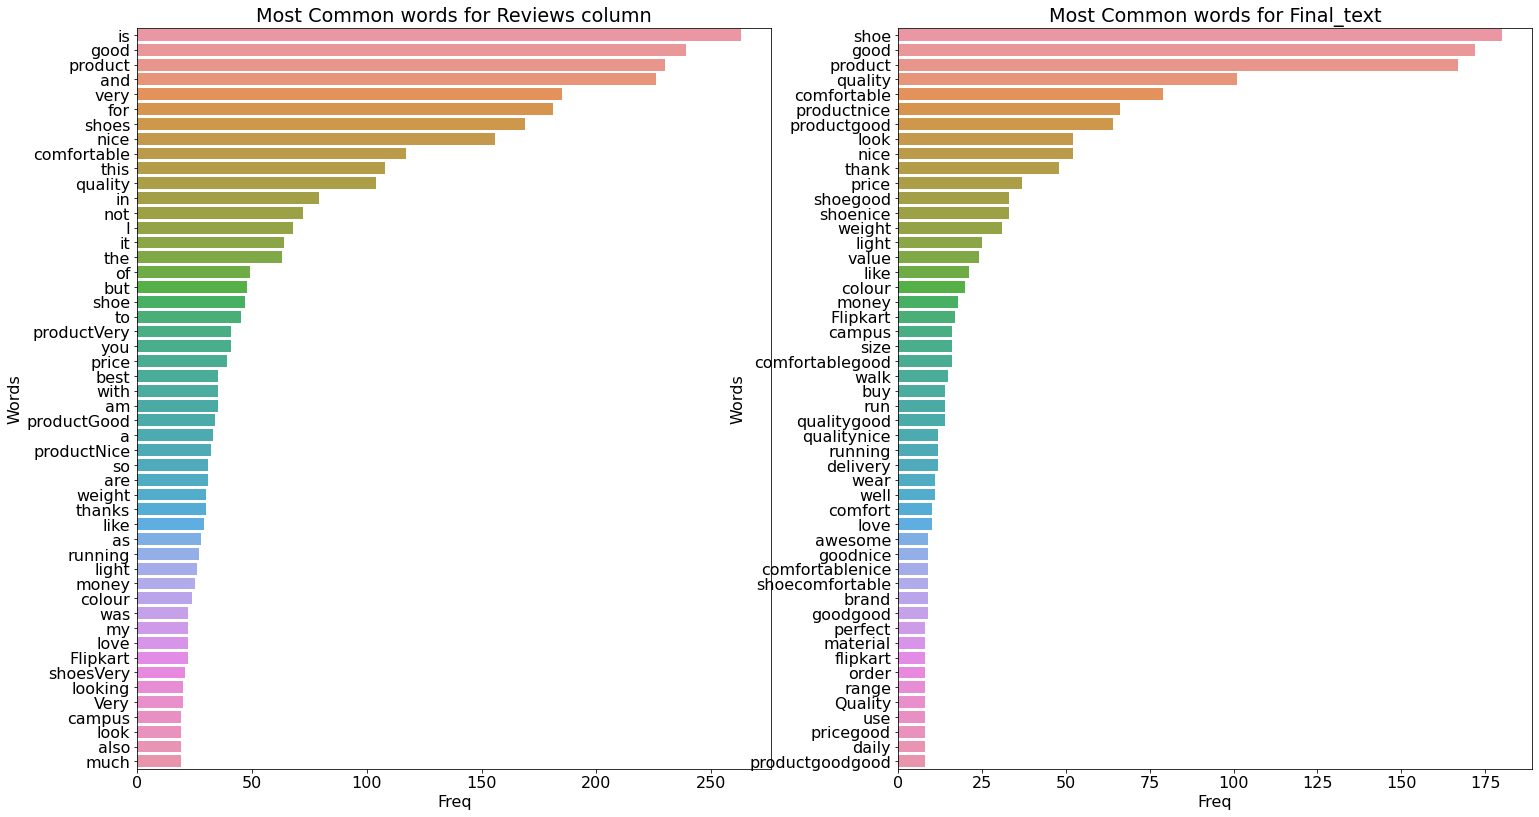

In [42]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize = (25, 30))
plt.subplot(2,2,1)
sns.barplot(data = mco_df, x = 'Freq', y = 'Words' )
plt.title("Most Common words for Reviews column")


plt.subplot(2,2,2)
sns.barplot(data = mcf_df, x = 'Freq', y = 'Words' )
plt.title("Most Common words for Final_text")
plt.show()

In [43]:
#Least Common words
least_common_original = Counter(''.join(file['Reviews']).split()).most_common()[-30 : ]
lco_df = pd.DataFrame(least_common_original, columns = ['Words', 'Freq'])
least_common_final = Counter(''.join(file['Final_text']).split()).most_common()[-30 : ]
lcf_df = pd.DataFrame(least_common_final, columns = ['Words', 'Freq'])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128077 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 127802 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128158 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128094 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128578 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 129392 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128149 missing from current font.

/usr/local/lib/python3.8/dist-packages/ma

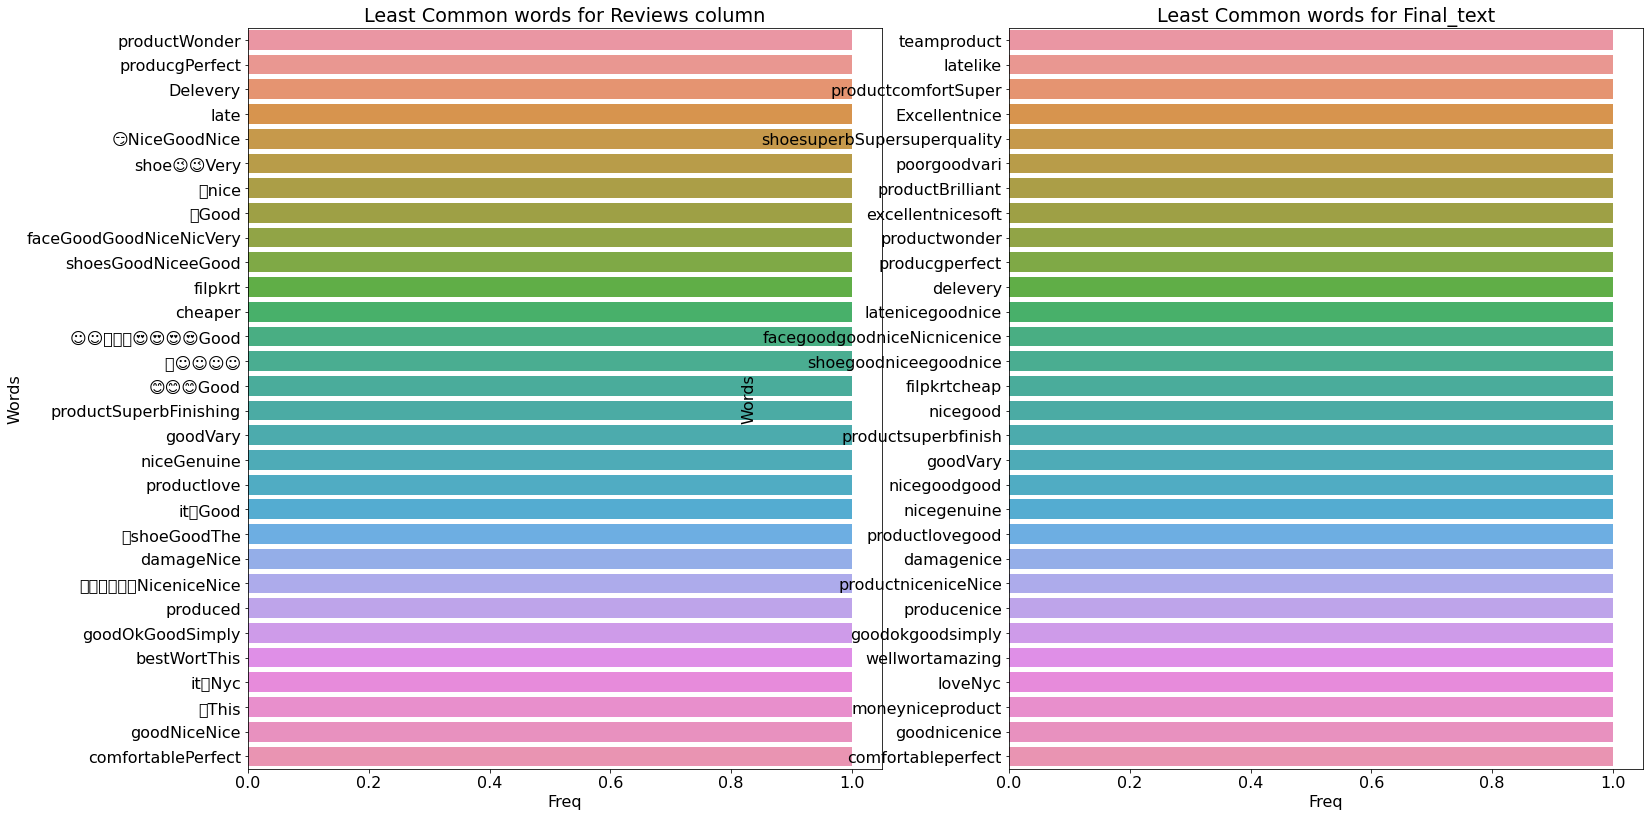

In [44]:
#Bar Plot OriginalTweet vs FinalText for Least Common words
plt.rcParams.update({'font.size': 16})
plt.figure(figsize = (25, 30))
plt.subplot(2,2,1)
sns.barplot(data = lco_df, x = 'Freq', y = 'Words' )
plt.title("Least Common words for Reviews column")


plt.subplot(2,2,2)
sns.barplot(data = lcf_df, x = 'Freq', y = 'Words' )
plt.title("Least Common words for Final_text")
plt.show()

# **Pie chart & bar chart clearly shows Original Reviews column contains lots of stopwords and punctuations whereas Final_text contains only useful words**

# **now we start spliting dataset into training & testing**

In [45]:
# Shuffle dataframe
file_shuffled = file.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
file_shuffled.head()

,Reviews,Rating,Without_emoji,Final_text
1034,Good product and such killer look 💯 superb 👌,5.0,Good product and such killer look superb,good product killer look superb
1176,Not good looking,NaN,Not good looking,good looking
67,Stylish shoes wow feelingThank you flipkart,4.0,Stylish shoes wow feelingThank you flipkart,stylish shoe wow feelingthank flipkart
1330,Good value for money Comfortable,4.0,Good value for money Comfortable,good value money comfortable
650,I just loved it ❤simply beautiful✨❤ 🥰The color...,4.0,I just loved it simply beautiful The color is ...,love simply beautiful color wow comfortable we...


In [ ]:
#as we only need Final Text column & Rating column so we drop remaining column.

In [46]:
file_shuffled.drop(columns=['Reviews','Without_emoji'],inplace=True)
file_shuffled

,Rating,Final_text
1034,5.0,good product killer look superb
1176,NaN,good looking
67,4.0,stylish shoe wow feelingthank flipkart
1330,4.0,good value money comfortable
650,4.0,love simply beautiful color wow comfortable we...
...,...,...
1638,5.0,awesome
1095,4.0,good product
1130,5.0,good
1294,5.0,excellent prodduct


In [47]:
file_shuffled=file_shuffled.dropna()

In [48]:
#Let's check how many examples of each target we have.
file_shuffled.Rating.value_counts()

5.0    1266
4.0     550
3.0     150
Name: Rating, dtype: int64

Since we have three Rating values, we're dealing with a multiple classification problem.

It's unbalanced too, about 80% positive  (Rating 4 & 5) and 20% Negative class (Rating 3).

# visualize random samples

In [49]:
for i in file_shuffled[["Final_text","Rating"]][0:10].itertuples():
  print(i)
  index, Final_text,Rating = i

Pandas(Index=1034, Final_text='good product killer look   superb', Rating=5.0)
Pandas(Index=67, Final_text='stylish shoe wow feelingthank flipkart', Rating=4.0)
Pandas(Index=1330, Final_text='good value money comfortable', Rating=4.0)
Pandas(Index=650, Final_text='love simply beautiful color wow comfortable wear Best price range', Rating=4.0)
Pandas(Index=1868, Final_text='good product', Rating=4.0)
Pandas(Index=986, Final_text='nice shoe campus', Rating=5.0)
Pandas(Index=1427, Final_text='good', Rating=4.0)
Pandas(Index=1668, Final_text='good qualitymy husband happy shoe thank Flipkart n thanx dilivery boy', Rating=5.0)
Pandas(Index=1574, Final_text='nice product', Rating=4.0)
Pandas(Index=1317, Final_text='nice product long', Rating=3.0)


# Split data into training and validation sets

In [50]:
#we have imbalance data so we split data with stratify
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(file_shuffled["Final_text"].to_numpy(),
                                                                            file_shuffled["Rating"].to_numpy(),stratify=file_shuffled["Rating"],
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [51]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(1769, 1769, 197, 197)

In [52]:
# View the first 10 training sentences and their labels
train_sentences[:5], train_labels[:5]

(array(['good quality good delivery', 'nice', 'good',
        'like product thank filpkart price low', 'like product'],
       dtype=object), array([5., 3., 4., 5., 4.]))

# **Converting text into numbers**

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization  #https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [54]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

3

In [55]:
#Now let's create another TextVectorization object using our custom parameters.
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 14 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [56]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

Training data mapped! Let's try our text_vectorizer on a custom sentence (one similar to what you might see in the training data).

In [57]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 14), dtype=int64, numpy=array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [58]:
import random
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
good quality      

Vectorized version:


<tf.Tensor: shape=(1, 14), dtype=int64, numpy=array([[2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [59]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 609
Top 5 most common words: ['', '[UNK]', 'good', 'nice', 'product']
Bottom 5 least common words: ['ali', 'affordable', 'activecell', 'active', 'abhinav']


# Creating an Embedding using an Embedding Layer

In [60]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [61]:
# Get a random sentence from training set
import random
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
super shoe      

Embedded version:


<tf.Tensor: shape=(1, 14, 128), dtype=float32, numpy=
array([[[-0.01906666, -0.01067507,  0.00669341, ...,  0.04949195,
         -0.02162114, -0.02049688],
        [-0.03521683, -0.00981399, -0.00284491, ..., -0.04792733,
         -0.01664252, -0.03293632],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

Each token in the sentence gets turned into a length 128 feature vector.

In [62]:
# Check out a single token's embedding
sample_embed[0][13]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.01645621, -0.00589932, -0.01471175, -0.00355174, -0.04663396,
        0.01846724,  0.02401174,  0.03724445, -0.02736737, -0.02768031,
       -0.01896119,  0.02223358, -0.03668128,  0.00480639,  0.00746088,
        0.03996835, -0.04905364,  0.00212307,  0.01345445, -0.03006717,
        0.02294225,  0.00458346, -0.03924345,  0.01767061,  0.01602763,
       -0.01630496,  0.01014177, -0.02893742,  0.03527372, -0.00593783,
        0.04485276, -0.02624741,  0.0311793 ,  0.00263394, -0.0005692 ,
       -0.02838715,  0.03457197,  0.03718841, -0.01916138,  0.01868038,
       -0.02623596,  0.02817228,  0.04671384, -0.04312984,  0.02987394,
        0.01602871,  0.00871513, -0.0335383 ,  0.02381023, -0.01794596,
        0.01073899, -0.00347652,  0.04780355,  0.02223145, -0.01765295,
        0.03257734, -0.00023085, -0.03051633,  0.02588748, -0.01619556,
       -0.02187194, -0.01848643,  0.01067092,  0.02498598,  0.00016055,
       -0.031717

In [63]:
#Model 0: Getting a baseline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [64]:
val_sentences.shape, val_labels.shape

((197,), (197,))

In [65]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 64.47%


In [66]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5.])

In [67]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [68]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'accuracy': 64.46700507614213,
 'precision': 0.41771987983010467,
 'recall': 0.6446700507614214,
 'f1': 0.5069541575647091}

In [69]:
#Model 1: A simple dense model
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [70]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="softmax")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [71]:
# Compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [72]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 14)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 14, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [73]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230123-164833
Epoch 1/10
56/56 [==============================] - 2s 17ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
56/56 [==============================] - 1s 14ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_

In [74]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [75]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.8358044 , -0.892744  ,  0.76576996, ..., -0.9103224 ,
          0.7705309 , -0.77212435],
        [ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
          0.03332629,  0.02803668],
        [ 0.81449145, -0.826357  ,  0.7675482 , ..., -0.89697963,
          0.7044809 , -0.7471026 ],
        ...,
        [-0.03301444, -0.0052493 , -0.04209725, ...,  0.02028764,
          0.00308807,  0.02215792],
        [ 0.04933501,  0.01553482,  0.01593169, ..., -0.01781169,
          0.02554074, -0.00167966],
        [ 0.03103676, -0.00607105, -0.01014895, ...,  0.04555799,
         -0.02234115, -0.04768636]], dtype=float32)>]

In [76]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [77]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

7/7 [==============================] - 0s 2ms/step


array([[0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994]], dtype=float32)

In [78]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)>

In [79]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_1_preds)
model_1_results

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



{'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

In [80]:
#Model 2: LSTM
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 14, 128)
(None, 64)


In [81]:
# Compile model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [82]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230123-165006
Epoch 1/5
56/56 [==============================] - 5s 37ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
56/56 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
56/56 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
56/56 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
56/56 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [83]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

7/7 [==============================] - 1s 4ms/step


((197, 1), array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32))

In [84]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [85]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



{'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")